In [7]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [8]:
X,Y = make_circles(n_samples=500,noise=0.02)

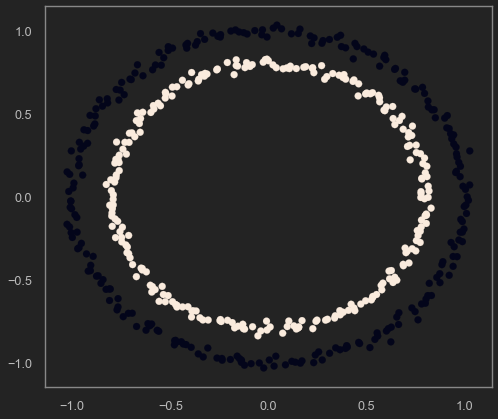

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()


- for calculating Z = x1^2 + x2^2 we will make X_=[x1 x2 z] 

In [10]:
def getX_(X):
    
    X_=np.zeros((X.shape[0],3))
    # print(X_.shape)
    X1 = X[:,0]
    X2 = X[:,1]
    
    X3 = X1**2 + X2**2
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [12]:
X_ = getX_(X)
X_.shape

(500, 3)

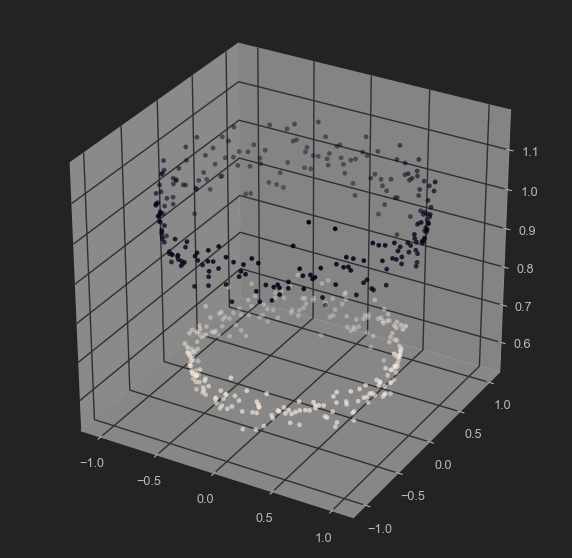

In [15]:
def plot3d(X,show = True):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax
plot3d(X_)
plt.show()

### Logistic Classifier on Lower Dimension

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [22]:
lr = LogisticRegression()
acc = cross_val_score(lr,X,Y,cv=5).mean()

In [23]:
print("Accuracy", acc)

Accuracy 0.462


- we got just 46% accuracy on this dataset, lets visualize the decision boundary

In [26]:
lr.fit(X,Y)
c = lr.coef_
b = lr.intercept_
print(c,b)

[[0.00088008 0.00289079]] [9.50834468e-07]


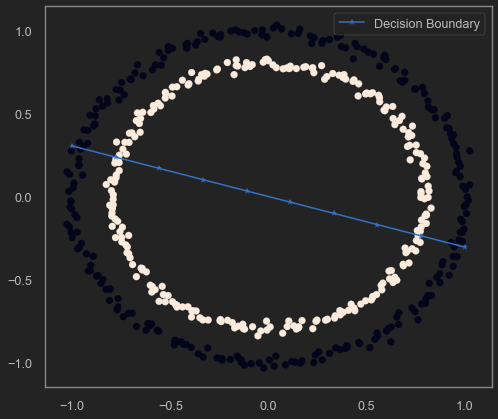

In [28]:
x1 = np.linspace(-1,1,10)
x2 = -1*(c[0,0]*x1 + b[0])/c[0,1]

plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,marker='*',label="Decision Boundary")
plt.legend()
plt.show()

In [38]:
print("Very bad accuracy",(acc)*100)

Very bad accuracy 46.2


### Logistic Classifier in Higher Dimension

In [40]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()

In [41]:
print(acc)

1.0


- we got 100% accuracy in higher dimension.

### Visualize the hyper plane

In [42]:
lr.fit(X_,Y)
wts = lr.coef_
b = lr.intercept_

In [43]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))

In [44]:
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [45]:
z = -1*(wts[0,0]*xx + wts[0,1]*yy + b)/wts[0,2]

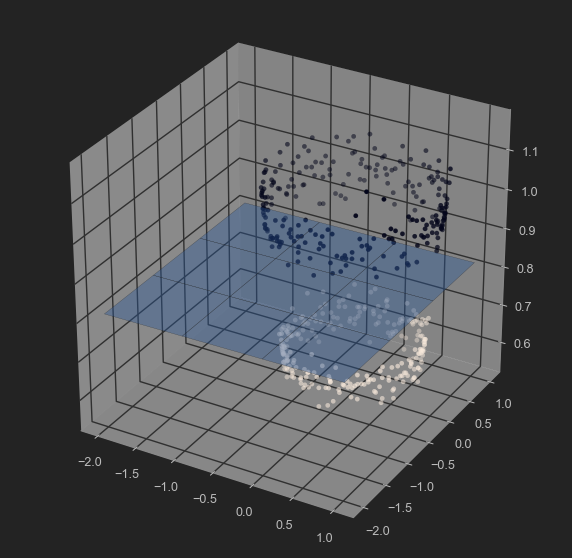

In [46]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.4)
plt.show()

### Difference between SVM and Logistic Regression
> SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point.


> SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.
SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.


> The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.


## Kernels in SVM

In [47]:
from sklearn import svm

In [48]:
svc1 = svm.SVC(kernel="linear")
svc2 = svm.SVC()  # default kernel is RBF
svc3 = svm.SVC(kernel="poly")
svc4 = svm.SVC(kernel="sigmoid")


In [49]:
svc1.fit(X,Y)
svc2.fit(X,Y)
svc3.fit(X,Y)
svc4.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print("linear K: ",svc1.score(X,Y)) # Linear kernel is used which doesnot classify good the non-linear problem
print("rbf K: ",svc2.score(X,Y))#  RBF kernel is classifying good(giving 100% accuracy in our case)
print("poly K: ",svc3.score(X,Y)) # polynomial kernel is used here
print("sigmoid K: ",svc4.score(X,Y)) # sigmoid kernel

linear K:  0.502
rbf K:  1.0
poly K:  0.546
sigmoid K:  0.508


- RBF kernel fits best in our dataset

### Custom Kernel- 
> we can also provide our own kernel.

In [52]:
# this is our custom kernel which uses what we used earlier in computing non-linear problem
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [53]:
svc5 = svm.SVC(kernel=custom_kernel)

In [54]:
svc5.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function custom_kernel at 0x000001A5DF17E8C8>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
print(svc5.score(X,Y)) # this accuracy is what we got  

1.0
